### Import the Needed Libraries

In [540]:
import bs4 as bs
import requests
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from urllib.request import Request, urlopen
from string import ascii_letters
import re

In [541]:
def txt_clean(word_list, stopwords_list, min_len):
    clean_words = []
    for line in word_list:
        parts = line.strip().split()
        for word in parts:
            word_l = word.lower()
            if word_l not in stopwords_list:
                if word_l.isalpha():#removes everything other than alphabet
                    if len(word_l) > min_len:
                        clean_words.append(word_l)
    return clean_words

### Define  the target URL and open it

In [542]:
req = Request('https://www.rottentomatoes.com/m/enola_holmes', headers=headers)
open_request = urlopen(req).read()

### Load the page into your "soup"/beautifulsoup

In [543]:
body = requests.get('https://www.rottentomatoes.com/m/enola_holmes')
soup = bs.BeautifulSoup(body.content,'html.parser')

### Identify the total number of pages

In [544]:
review_pages_list = list()
headers = {'User-Agent': 'Opera/9.80 (X11; Linux i686; Ub'
               'untu/14.10) Presto/2.12.388 Version/12.16'}
req = Request('https://www.rottentomatoes.com/m/enola_holmes' + "/reviews/?page=1", headers=headers)
open_request = urlopen(req).read()
soup = bs.BeautifulSoup(open_request, 'lxml').find_all("span", {"class", "pageInfo"})
if len(soup) >= 1:
    for n in range(1, int(soup[0].text[-2:]) + 1):
        review_pages_list.append('https://www.rottentomatoes.com/m/enola_holmes' + "/reviews/?page=" + str(n))
        
print('Review Page URL', review_pages_list)
print('\n Total Number of Review Pages', len(review_pages_list))

Review Page URL ['https://www.rottentomatoes.com/m/enola_holmes/reviews/?page=1', 'https://www.rottentomatoes.com/m/enola_holmes/reviews/?page=2', 'https://www.rottentomatoes.com/m/enola_holmes/reviews/?page=3', 'https://www.rottentomatoes.com/m/enola_holmes/reviews/?page=4', 'https://www.rottentomatoes.com/m/enola_holmes/reviews/?page=5', 'https://www.rottentomatoes.com/m/enola_holmes/reviews/?page=6', 'https://www.rottentomatoes.com/m/enola_holmes/reviews/?page=7', 'https://www.rottentomatoes.com/m/enola_holmes/reviews/?page=8', 'https://www.rottentomatoes.com/m/enola_holmes/reviews/?page=9', 'https://www.rottentomatoes.com/m/enola_holmes/reviews/?page=10']

 Total Number of Review Pages 10


## Loop through each page, creating a new soup every time 

In [545]:
count = 1
for pages in review_pages_list:
    body = requests.get(pages)
    soup = bs.BeautifulSoup(body.content,'html.parser')
    print('Page No' + '_' + str(count) + '\n' + str(soup) + '\n')

Page No_1
<!DOCTYPE html>

<html dir="ltr" lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
<head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#">
<!-- salt=lay-def-02-juRm -->
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Enola Holmes - Movie Reviews</title>
<meta content="Rotten Tomatoes, home of the Tomatometer, is the most trusted measurement of quality for Movies &amp; TV. The definitive site for Reviews, Trailers, Showtimes, and Tickets" name="description"/>
<link href="https://www.rottentomatoes.com/m/enola_holmes/reviews" rel="canonical"/>
<link href="https://www.rottentomatoes.com/assets/pizza-pie/images/favicon.ico" rel="shortcut icon" sizes="76x76" type="image/x-icon"/>
<meta content="326803741017" property="fb:app_id"/>
<meta c

Page No_1
<!DOCTYPE html>

<html dir="ltr" lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
<head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#">
<!-- salt=lay-def-02-juRm -->
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Enola Holmes - Movie Reviews</title>
<meta content="Rotten Tomatoes, home of the Tomatometer, is the most trusted measurement of quality for Movies &amp; TV. The definitive site for Reviews, Trailers, Showtimes, and Tickets" name="description"/>
<link href="https://www.rottentomatoes.com/m/enola_holmes/reviews" rel="canonical"/>
<link href="https://www.rottentomatoes.com/assets/pizza-pie/images/favicon.ico" rel="shortcut icon" sizes="76x76" type="image/x-icon"/>
<meta content="326803741017" property="fb:app_id"/>
<meta c

Page No_1
<!DOCTYPE html>

<html dir="ltr" lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
<head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#">
<!-- salt=lay-def-02-juRm -->
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Enola Holmes - Movie Reviews</title>
<meta content="Rotten Tomatoes, home of the Tomatometer, is the most trusted measurement of quality for Movies &amp; TV. The definitive site for Reviews, Trailers, Showtimes, and Tickets" name="description"/>
<link href="https://www.rottentomatoes.com/m/enola_holmes/reviews" rel="canonical"/>
<link href="https://www.rottentomatoes.com/assets/pizza-pie/images/favicon.ico" rel="shortcut icon" sizes="76x76" type="image/x-icon"/>
<meta content="326803741017" property="fb:app_id"/>
<meta c

Page No_1
<!DOCTYPE html>

<html dir="ltr" lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
<head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#">
<!-- salt=lay-def-02-juRm -->
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Enola Holmes - Movie Reviews</title>
<meta content="Rotten Tomatoes, home of the Tomatometer, is the most trusted measurement of quality for Movies &amp; TV. The definitive site for Reviews, Trailers, Showtimes, and Tickets" name="description"/>
<link href="https://www.rottentomatoes.com/m/enola_holmes/reviews" rel="canonical"/>
<link href="https://www.rottentomatoes.com/assets/pizza-pie/images/favicon.ico" rel="shortcut icon" sizes="76x76" type="image/x-icon"/>
<meta content="326803741017" property="fb:app_id"/>
<meta c

Page No_1
<!DOCTYPE html>

<html dir="ltr" lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
<head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#">
<!-- salt=lay-def-02-juRm -->
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Enola Holmes - Movie Reviews</title>
<meta content="Rotten Tomatoes, home of the Tomatometer, is the most trusted measurement of quality for Movies &amp; TV. The definitive site for Reviews, Trailers, Showtimes, and Tickets" name="description"/>
<link href="https://www.rottentomatoes.com/m/enola_holmes/reviews" rel="canonical"/>
<link href="https://www.rottentomatoes.com/assets/pizza-pie/images/favicon.ico" rel="shortcut icon" sizes="76x76" type="image/x-icon"/>
<meta content="326803741017" property="fb:app_id"/>
<meta c

Page No_1
<!DOCTYPE html>

<html dir="ltr" lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
<head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#">
<!-- salt=lay-def-02-juRm -->
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Enola Holmes - Movie Reviews</title>
<meta content="Rotten Tomatoes, home of the Tomatometer, is the most trusted measurement of quality for Movies &amp; TV. The definitive site for Reviews, Trailers, Showtimes, and Tickets" name="description"/>
<link href="https://www.rottentomatoes.com/m/enola_holmes/reviews" rel="canonical"/>
<link href="https://www.rottentomatoes.com/assets/pizza-pie/images/favicon.ico" rel="shortcut icon" sizes="76x76" type="image/x-icon"/>
<meta content="326803741017" property="fb:app_id"/>
<meta c

Page No_1
<!DOCTYPE html>

<html dir="ltr" lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
<head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#">
<!-- salt=lay-def-02-juRm -->
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Enola Holmes - Movie Reviews</title>
<meta content="Rotten Tomatoes, home of the Tomatometer, is the most trusted measurement of quality for Movies &amp; TV. The definitive site for Reviews, Trailers, Showtimes, and Tickets" name="description"/>
<link href="https://www.rottentomatoes.com/m/enola_holmes/reviews" rel="canonical"/>
<link href="https://www.rottentomatoes.com/assets/pizza-pie/images/favicon.ico" rel="shortcut icon" sizes="76x76" type="image/x-icon"/>
<meta content="326803741017" property="fb:app_id"/>
<meta c

Page No_1
<!DOCTYPE html>

<html dir="ltr" lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
<head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#">
<!-- salt=lay-def-02-juRm -->
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Enola Holmes - Movie Reviews</title>
<meta content="Rotten Tomatoes, home of the Tomatometer, is the most trusted measurement of quality for Movies &amp; TV. The definitive site for Reviews, Trailers, Showtimes, and Tickets" name="description"/>
<link href="https://www.rottentomatoes.com/m/enola_holmes/reviews" rel="canonical"/>
<link href="https://www.rottentomatoes.com/assets/pizza-pie/images/favicon.ico" rel="shortcut icon" sizes="76x76" type="image/x-icon"/>
<meta content="326803741017" property="fb:app_id"/>
<meta c

Page No_1
<!DOCTYPE html>

<html dir="ltr" lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
<head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#">
<!-- salt=lay-def-02-juRm -->
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Enola Holmes - Movie Reviews</title>
<meta content="Rotten Tomatoes, home of the Tomatometer, is the most trusted measurement of quality for Movies &amp; TV. The definitive site for Reviews, Trailers, Showtimes, and Tickets" name="description"/>
<link href="https://www.rottentomatoes.com/m/enola_holmes/reviews" rel="canonical"/>
<link href="https://www.rottentomatoes.com/assets/pizza-pie/images/favicon.ico" rel="shortcut icon" sizes="76x76" type="image/x-icon"/>
<meta content="326803741017" property="fb:app_id"/>
<meta c

Page No_1
<!DOCTYPE html>

<html dir="ltr" lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
<head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#">
<!-- salt=lay-def-02-juRm -->
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Enola Holmes - Movie Reviews</title>
<meta content="Rotten Tomatoes, home of the Tomatometer, is the most trusted measurement of quality for Movies &amp; TV. The definitive site for Reviews, Trailers, Showtimes, and Tickets" name="description"/>
<link href="https://www.rottentomatoes.com/m/enola_holmes/reviews" rel="canonical"/>
<link href="https://www.rottentomatoes.com/assets/pizza-pie/images/favicon.ico" rel="shortcut icon" sizes="76x76" type="image/x-icon"/>
<meta content="326803741017" property="fb:app_id"/>
<meta c

###  Collect Review and Respective Score and creating list of lists of reviews

In [584]:
review_list = []
review_list_all = [] 
score_list = []
for pages in review_pages_list:
    body = requests.get(pages)
    soup = bs.BeautifulSoup(body.content,'html.parser')
    review = soup.find_all("div", {"class": "the_review"})
    score = soup.find_all("div", {"class": "small subtle review-link"})
    for i in range(len(review)):
        scores = score[i].text.replace('\nFull Review\r\n                    \r\n\r\n                    \r\n                         | Original Score: ','')
        scores = scores.rstrip()
        if '\nFull Review' not in scores:
            reviews = review[i].text.replace('\r\n                    ','')
            reviews = reviews.rstrip()
            review_list.append(reviews)
            score_list.append(scores)
    review_list_all.append(review_list) #Generated a list of list for the reviews

In [585]:
print(review_list_all)

[['Buoyant and precocious without being even slightly annoying, Brown has pinpoint comic timing, infectious perk, and a wholesome, tomboyish aura: imagine a young Keira Knightley crossed with Phoebe Waller-Bridge.', "Millie Bobby Brown's performance is magnetic and the female empowerment message is always welcomed. A fun entertaining 2 hours of escapism.", 'Fleet and mostly exhilarating...an engaging riff on the Holmes mystique, and the start of what could become an enjoyable franchise.', 'It gives us a new unauthorized Holmes sleuth to ponder.', 'A welcome and refreshing take on the Sherlock Holmes story, Helena Bonham Carter is a true highlight.', '"Enola Homes" is the kind of movie that the preteen set will surely delight in and watch over and over. I know I would have.', 'So delightfully subversive that it deserves to become a Netflix series.', 'Millie Bobby Brown absolutely rules in this movie.', '... extremely entertaining, regardless the messy way it was assembled.', 'Millie Bob

### Standardize scores 

In [586]:
def stand_score(score_list):
    new_score_list = []
    for score in score_list:
        if '/' in score:
            score = score[0]
            score = int(score)
        elif '/' in score and '.' in score:
            score = score[0] + '.' + score[2]
            score = float(score)
        elif 'A+' in score:
            score = int(5)
        elif 'A' in score:
            score = float(4.8)
        elif 'A-' in score:
            score = float(4.6)
        elif 'B+' in score:
            score = float(4.45)
        elif 'B' in score:
            score = float(4.3)
        elif 'B-' in score:
            score = float(4.1)
        elif 'C+' in score:
            score = float(3.95)
        elif 'C' in score:
            score = float(3.8)
        elif 'C-' in score:
            score = float(3.6)
        elif 'D+' in score:
            score = float(3.45)
        elif 'D' in score:
            score = float(3.3)
        elif 'D-' in score:
            score = float(3.1)
        new_score_list.append(score)
    return new_score_list

In [587]:
new_score = stand_score(score_list)

In [588]:
new_score

[3,
 '3.5',
 4.45,
 4.3,
 4,
 2,
 7,
 3,
 3,
 3,
 4.8,
 3,
 3,
 3,
 5,
 2,
 2,
 4,
 2,
 4,
 3,
 4,
 4,
 3,
 3,
 3.8,
 8,
 6,
 3,
 4,
 2,
 3.95,
 3,
 6,
 3,
 2,
 4.45,
 4.3,
 4,
 4,
 4,
 3.8,
 3,
 6,
 7,
 4,
 9,
 9,
 3,
 4,
 4.45,
 3,
 8,
 5,
 3,
 7,
 2,
 4.3,
 3,
 4.3,
 4,
 3,
 7,
 4,
 3,
 3,
 4.8,
 3,
 3,
 3,
 3,
 2,
 4,
 3,
 4,
 3,
 3,
 3,
 4,
 7,
 3,
 3,
 3,
 3,
 4,
 3,
 4.3,
 4,
 4,
 4.3,
 7,
 4.45,
 3,
 1,
 4,
 6,
 4.3,
 3,
 7,
 5,
 4,
 3,
 2,
 4,
 3,
 4,
 3,
 2,
 3,
 4.45,
 4,
 8,
 4,
 4,
 '8',
 3,
 4.8,
 4,
 4,
 4.3,
 2,
 3,
 3,
 3]

###  Top 5 and Bottom 5 review lists

In [596]:
rev = []
rat = []
for pages in review_pages_list[1:8]:
    body = requests.get(pages)
    soup = bs.BeautifulSoup(body.content,'html.parser')
    review = soup.find_all("div", {"class": "the_review"})
    score = soup.find_all("div", {"class": "small subtle review-link"})
    for i in range(len(review)):
        scores = score[i].text.replace('\nFull Review\r\n                    \r\n\r\n                    \r\n                         | Original Score: ','')
        scores = scores.rstrip()
        if '\nFull Review' not in scores:
            reviews = review[i].text.replace('\r\n                    ','')
            reviews = reviews.rstrip()
            rev.append(reviews)
            rat.append(scores)

In [597]:
rat_ = stand_score(rat)
rev_rat = {k: v for k, v in zip(rev, rat_)}

In [598]:
sort_bottom = sorted(rev_rat.items(), key = lambda kv: kv[1])

In [599]:
sort_top = sorted(rev_rat.items(), key = lambda kv: kv[1], reverse = True)

In [600]:
sort_top[:5]

[('Enola Holmes is an engaging, exciting mystery that the entire family will enjoy.',
  9),
 ('The characters, humour, and the hugely enjoyable take on a familiar mythos make Enola Holmes a genuine delight.',
  9),
 ('Enola Holmes is the joy we needed from 2020.', 8),
 ("The film plays with form the way Enola plays with words: dazzlingly, whimsically and sarcastically. It's a light escape from a world that seems to be getting darker by the day.",
  8),
 ("Enola Holmes is a pretty looking endeavour that takes full advantage of Millie Bobby Brown's natural charm on screen to sustain a rather standard aventure flick, with its aim clearly targeted at pleasing younger demographics.",
  7)]

In [601]:
sort_bottom[:5] 

[('There\'s a certain kind of empty British movie, and "Enola Holmes" is it.',
  1),
 ("In Enola Holmes, there's a new Holmes in the hunt.", 2),
 ("Gorgeously shot, and it looks amazing, but it's really boring...too bad this movie doesn't work or entertain, because it has all the cinematic goods...extremely dull...",
  2),
 ('Enola Holmes is an above-average romp that works best when it concentrates on the details.',
  2),
 ('[T]he film underestimates the savviness of what should be its natural audience by having her do more running around and martial arts than actual sleuthing.',
  2)]

### A word cloud for each of them

In [607]:
stopwords_file = open('C://Users//HP//Desktop//fo//stopwords_en.txt','r', encoding='utf8')
stopwords = []
txt_words_t = []
txt_words_b = []

for word in stopwords_file:
    stopwords.append(word.strip())
    
for word in sort_top:
    word = str(word)
    txt_words_t.append(word.strip())
        
for word in sort_bottom:
    word = str(word)
    txt_words_b.append(word.strip())
    
stopwords.extend(['hospitalizations','podcast','site'])
min_word_len = 3
clean_words_t = txt_clean(txt_words_t, stopwords, min_word_len)
clean_words_b = txt_clean(txt_words_b, stopwords, min_word_len)

In [608]:
print(clean_words_t)
print('\n')
print(len(clean_words_t))
print('\n')
print(len(clean_words_b))

['holmes', 'exciting', 'mystery', 'entire', 'family', 'hugely', 'enjoyable', 'familiar', 'mythos', 'make', 'enola', 'holmes', 'genuine', 'holmes', 'needed', 'film', 'plays', 'form', 'enola', 'plays', 'whimsically', 'light', 'escape', 'world', 'getting', 'darker', 'holmes', 'pretty', 'looking', 'endeavour', 'takes', 'advantage', 'millie', 'bobby', 'natural', 'charm', 'screen', 'sustain', 'standard', 'aventure', 'clearly', 'targeted', 'pleasing', 'younger', 'high', 'time', 'nancy', 'drew', 'companion', 'badass', 'female', 'detective', 'reason', 'enola', 'holmes', 'worth', 'quite', 'good', 'playing', 'qualities', 'eccentric', 'delightful', 'leading', 'claflin', 'magnificently', 'aggravating', 'secondary', 'villain', 'devilishly', 'handsome', 'cavill', 'effortlessly', 'charming', 'famous', 'historically', 'savvy', 'adults', 'younger', 'viewers', 'seeking', 'certainly', 'enola', 'spunky', 'millie', 'bobby', 'brown', 'leading', 'fantastic', 'direction', 'harry', 'enola', 'holmes', 'absolute'

('enola', 'holmes')
('millie', 'bobby')
('bobby', 'brown')
('sherlock', 'holmes')


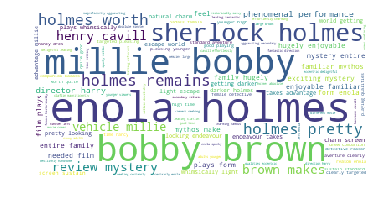

In [609]:
nltk.bigrams(clean_words_t)
bigrams_list2=list(nltk.bigrams(clean_words_t))

cnt2 = Counter(bigrams_list2)

freq_bigrams_list=[]
for k, v in cnt2.items() :
    if v > 2:
        print(k)
        freq_bigrams_list.append(k[0])
        freq_bigrams_list.append(k[1])
        
if (len(freq_bigrams_list)==0):
    all_words_string = ' '.join(clean_words_t)#if no frequent bigrams
else:
    all_words_string = ' '.join(clean_words_t).join(freq_bigrams_list)
    
wc = WordCloud(background_color="white", max_words=1000)
wc.generate(all_words_string)

wc.to_file('C://Users//HP//Desktop//fo//Top_cloud1.png')

plt.imshow(wc)
plt.axis('off')
plt.show()

('enola', 'holmes')
('millie', 'bobby')
('bobby', 'brown')
('sherlock', 'holmes')


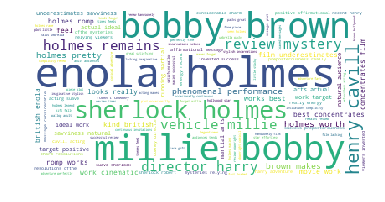

In [610]:
nltk.bigrams(clean_words_b)
bigrams_list2=list(nltk.bigrams(clean_words_b))

cnt2 = Counter(bigrams_list2)

freq_bigrams_list=[]
for k, v in cnt2.items() :
    if v > 2:
        print(k)
        freq_bigrams_list.append(k[0])
        freq_bigrams_list.append(k[1])
        
if (len(freq_bigrams_list)==0):
    all_words_string = ' '.join(clean_words_b)#if no frequent bigrams
else:
    all_words_string = ' '.join(clean_words_b).join(freq_bigrams_list)
    
wc = WordCloud(background_color="white", max_words=1000)
wc.generate(all_words_string)

wc.to_file('C://Users//HP//Desktop//fo//Bottom_cloud1.png')

plt.imshow(wc)
plt.axis('off')
plt.show()